In [15]:
import numpy as np                   
import pandas as pa                 
import matplotlib.pyplot as plt      
import seaborn as sn                
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco 
from sklearn.model_selection import cross_val_score

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [16]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [17]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [18]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [19]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [20]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [21]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

## K- nearest neighbors

In [22]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [23]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [24]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]      
y_test = y[:test]
X_train = X[test:]   
y_train = y[test:]

In [25]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 
    
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.6552123607582947
Testing R2: 0.6716308728911049


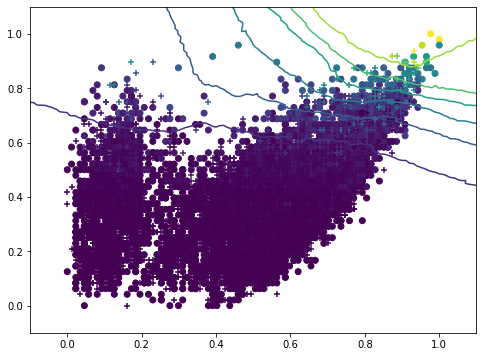

In [26]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [27]:
knn = cross_val_score(reg, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.6785720476385857
KNN Standard Deviation R2: 0.04631729025528911


In [28]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [29]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [30]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

Training R2: 0.5400056289397395
Testing R2: 0.517110921766373


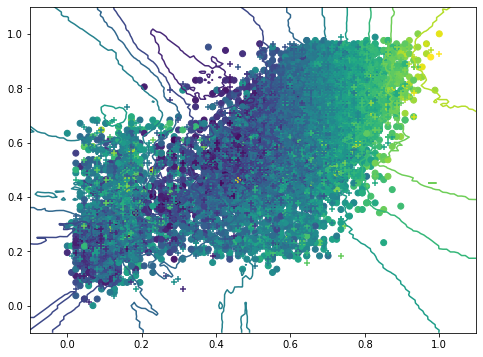

In [31]:
reg1 = KNeighborsRegressor(n_neighbors=25)
reg1.fit(X_train, y_train)
plot_reg_model(reg1, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [32]:
knn = cross_val_score(reg1, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.5067057180926161
KNN Standard Deviation R2: 0.029164625258315518


## PCA Model
* PCA Model with colums 7,8,9 vs Age

In [33]:
X = np.array(fifa.iloc[:,7:10])
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)          
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]     
y_test = y[:test]
X_train = Xpca[test:]   
y_train = y[test:]


In [34]:
cat1 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08557022096989471, 0.060734149054505006)

In [35]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 
    
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.00011387334253032401
Testing R2: -0.0013225609698293006


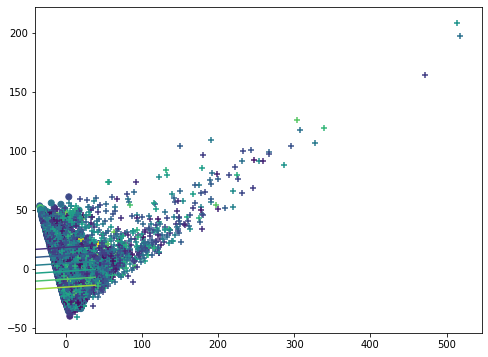

In [36]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [37]:
pca = cross_val_score(reg, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03785960105061731
PCA Standard Deviation R2: 0.007830368161982994


* PCA Model With Columns 10,11,12 vs Age

In [38]:
X = np.array(fifa.iloc[:,10:13])                        
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2) 
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]      
y_test = y[:test]
X_train = Xpca[test:]    
y_train = y[test:]


In [39]:
cat2 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat2.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08564437194127243, 0.08609566184649611)

Training R2: 0.00011946861467548864
Testing R2: -0.000537302075301449


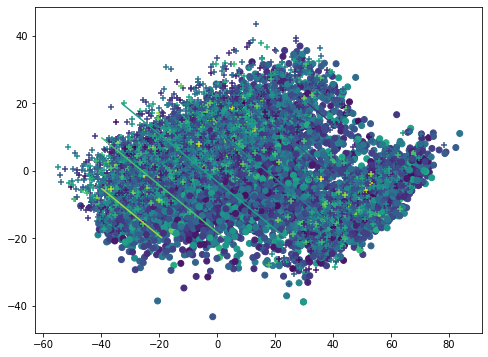

In [40]:
reg2 = LinearRegression()
reg2.fit(X_train,y_train)
plot_reg_model(reg2, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [41]:
pca = cross_val_score(reg2, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03317504466395099
PCA Standard Deviation R2: 0.011357309522026396


### Regression Models Liner, Ridge, and Lasso

In [42]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [43]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)           
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]      
    y_test = y[:test]
    X_train = X[test:]     
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
    
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.3754353536240453
Testing R2: 0.35595505616458534


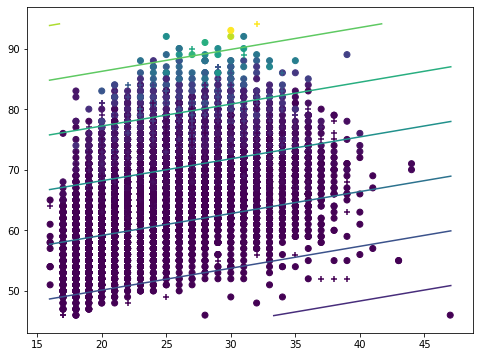

In [44]:
reg = LinearRegression()
plot_reg_model(reg, X, y)
plt.show()

Training R2: 0.37156805831958994
Testing R2: 0.37212301988037966


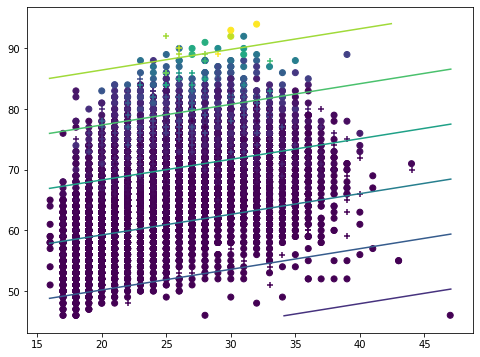

In [45]:
ridge_reg = Ridge(alpha=2)
plot_reg_model(ridge_reg, X, y)
plt.show()

Training R2: 0.3671559347183858
Testing R2: 0.3966333232442271


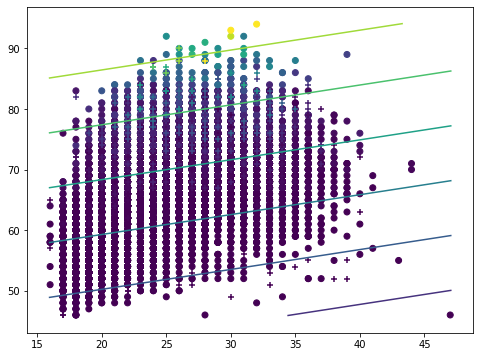

In [46]:
lasso_reg=Lasso(alpha=1)
plot_reg_model(lasso_reg, X, y)
plt.show()

Training R2: 0.771379943288871
Testing R2: 0.7079151509789392


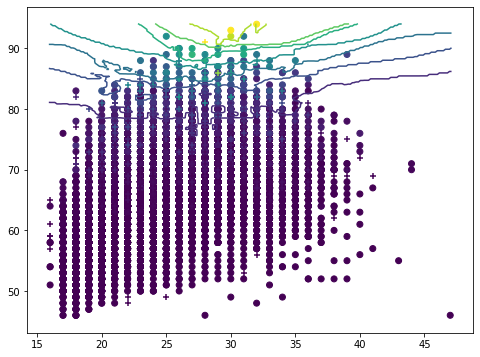

In [47]:
knn = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn, X, y)
plt.show()

Training R2: 0.7871879255718788
Testing R2: 0.6677398408012043


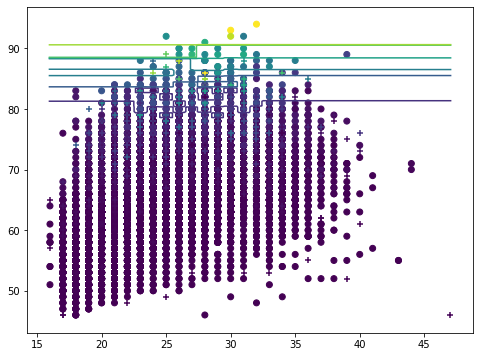

In [48]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y)
plt.show()

#### Cross Validation

In [49]:
lreg = cross_val_score(reg, X, y, cv=10)
ridge = cross_val_score(ridge_reg, X, y, cv=10)
LASSO = cross_val_score(lasso_reg, X, y, cv=10)
TREE = cross_val_score(tree, X, y, cv=10)

In [50]:
print('Linear Regression Mean R2: {}'.format(lreg.mean()))
print('Linear Regression Standard Deviation R2: {}'.format(lreg.std()))

Linear Regression Mean R2: -83.31855263403419
Linear Regression Standard Deviation R2: 237.01937423740821


In [51]:
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -83.31767530533001
Ridge Standard Deviation R2: 237.01691550468036


In [52]:
print('Lasso Mean R2: {}'.format(LASSO.mean()))
print('Lasso Standard Deviation R2: {}'.format(LASSO.std()))

Lasso Mean R2: -81.03511768363349
Lasso Standard Deviation R2: 230.99397781248348


In [53]:
print('Tree Mean R2: {}'.format(TREE.mean()))
print('Tree Standard Deviation R2: {}'.format(TREE.std()))

Tree Mean R2: -0.09281349373616797
Tree Standard Deviation R2: 0.093042535633659


## Nueral Networks

In [54]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

In [55]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)          
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]     
    y_test = y[:test]
    X_train = X[test:]   
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
   
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 
   
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

### Nueral Network Ridge Regression

Training R2: 0.3454780865087358
Testing R2: 0.3882124059258454


<function matplotlib.pyplot.show(*args, **kw)>

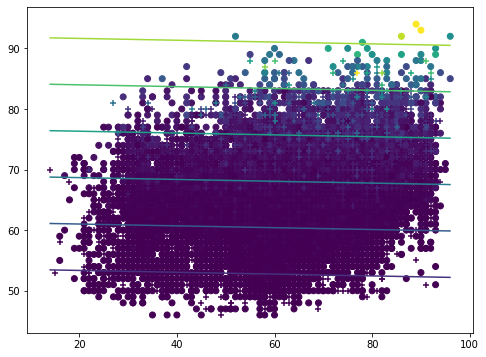

In [56]:
r_reg = Ridge(alpha=2)
plot_reg_model(r_reg, X, y)
plt.show

In [57]:
ridge = cross_val_score(r_reg, X, y, cv=10)
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -89.69855976614753
Ridge Standard Deviation R2: 257.05798743335174


### Nueral Network Lasso Regression

Training R2: 0.34740546928977656
Testing R2: 0.3786672423562258


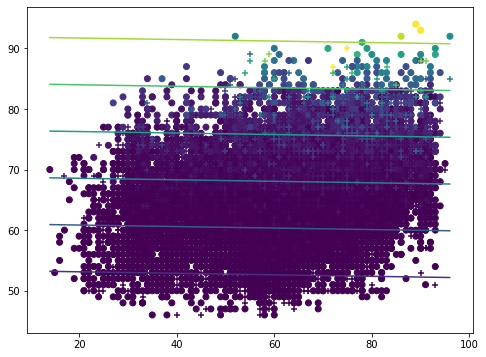

In [58]:
l_reg=Lasso(alpha=1)
plot_reg_model(l_reg, X, y)
plt.show()

In [59]:
lasso = cross_val_score(l_reg, X, y, cv=10)
print('Lasso Mean R2: {}'.format(lasso.mean()))
print('Lasso Standard Deviation R2: {}'.format(lasso.std()))

Lasso Mean R2: -86.86846732479378
Lasso Standard Deviation R2: 248.97339510556557


### Nueral Network K-nearest Neighbors Regression

Training R2: 0.7656410852413394
Testing R2: 0.7418519305457154


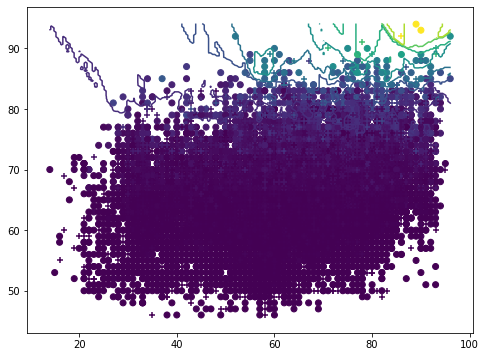

In [60]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y)
plt.show()

In [61]:
knn = cross_val_score(knn, X, y, cv=10)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: -0.2503245935877572
KNN Standard Deviation R2: 0.11359501797490984


### Nueral Network Decision Tree Regression

Training R2: 0.8239523560687513
Testing R2: 0.7170106650376218


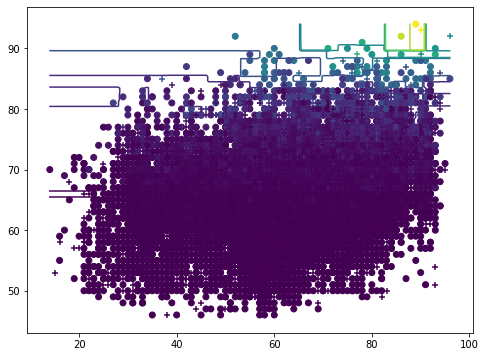

In [62]:
tree = DecisionTreeRegressor(max_depth=10)
plot_reg_model(tree, X, y)
plt.show()

In [63]:
tree = cross_val_score(tree, X, y, cv=10)
print('Tree Mean R2: {}'.format(tree.mean()))
print('Tree Standard Deviation R2: {}'.format(tree.std()))

Tree Mean R2: -0.34267284444441587
Tree Standard Deviation R2: 0.5351971245281321


### Ensemble Methods

Training R2: 0.7613626188170333
Testing R2: 0.7213125798189011


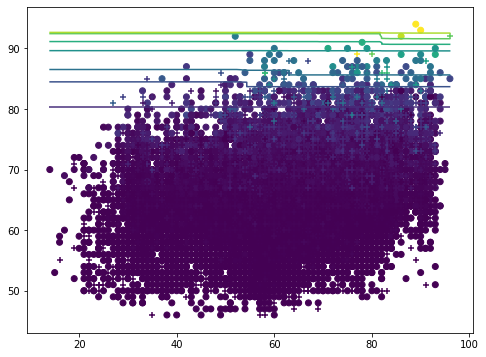

In [64]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y)
plt.show()

In [65]:
Ensemble = cross_val_score(forest, X, y, cv=10)
print('Ensemble Mean R2: {}'.format(Ensemble.mean()))
print('Ensemble Standard Deviation R2: {}'.format(Ensemble.std()))

Ensemble Mean R2: -0.5412544442675158
Ensemble Standard Deviation R2: 0.9022924044835035


### Gradient Boosting Esamble Network Model

Training R2: 0.7996211413599366
Testing R2: 0.7770370423798494


<function matplotlib.pyplot.show(*args, **kw)>

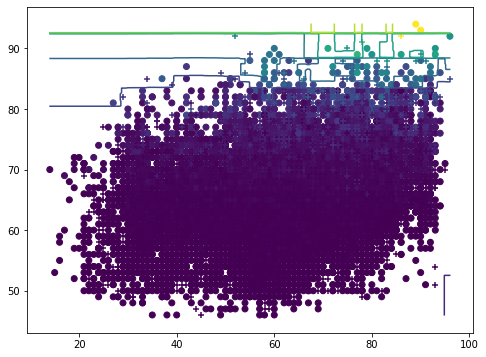

In [66]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
plot_reg_model(boost, X, y)
plt.show

In [67]:
Boost = cross_val_score(boost, X, y, cv=10)
print('Boost Mean R2: {}'.format(Boost.mean()))
print('Boost Standard Deviation R2: {}'.format(Boost.std()))

Boost Mean R2: -0.10927113584264214
Boost Standard Deviation R2: 0.1313927757003618


### Nueral Networks for Regression

In [68]:
X = np.array(fifa[['Age','Overall']])
y = np.array(fifa['Wage'])

In [69]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()  

Training R2: 0.7600007728945156
Testing R2: 0.7407644649697147


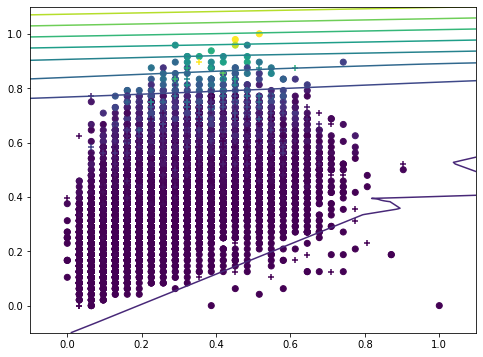

In [80]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y)
plt.show()

In [82]:
mlp_score = cross_val_score(mlp, Xn, y, cv=10)
print('MLP Mean R2: {}'.format(mlp_score.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp_score.std()))

MLP Mean R2: -12.340354040632008
MLP Standard Deviation R2: 37.058667475700524


* adding an addtional layer to improve performance

Training R2: 0.7503296167346485
Testing R2: 0.759794256021628


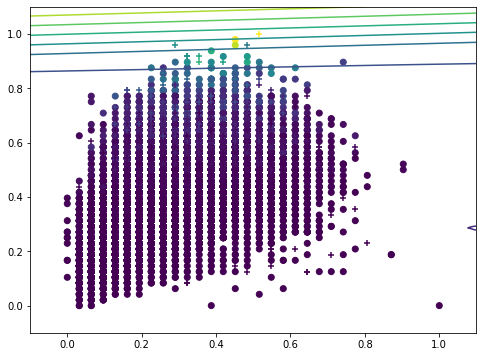

In [72]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp2, Xn, y)
plt.show()

In [73]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
mlp = cross_val_score(mlp2, Xn, y, cv=4)
print('MLP Mean R2: {}'.format(mlp.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp.std()))

MLP Mean R2: -0.6936284852824836
MLP Standard Deviation R2: 1.137929375262263


#### We tried to use the new method of running the cross validation on each our models but we are getting means and standard deviations that do not make sense and are completely off from our testing and training sets. Knowing that, we will try using different methods of cross validation from the scikitlearn website to see if those will work. If those different methods do not work we will go back to computing it by hand. 

## What's next
    * Input the decision tree (Jordana)
    * Find different method of cross validation that will produce accurate values (Lee)
    * Implement newest models (Lee and Luke)
    * Run already working models against different features (Linear,Ridge, Lasso - SAM) 
        (Remainding models will be split among Lee,Jordana, and Luke)

# Cross validation

In [74]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25,
    random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))
#[9 1 6 7 3 0 5] [2 8 4]

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


In [75]:
ss = ShuffleSplit(n_splits=5, test_size=0.1).split(Xn)
score_train = []
score_test = []
for train_index, test_index in ss:
    mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
    mlp2.fit(Xn[train_index,:],y[train_index])
    score_train+=[mlp2.score(Xn[train_index,:],y[train_index])]
    score_test+=[mlp2.score(Xn[test_index,:],y[test_index])]
score_test

[0.7182964112337921,
 0.687633953915777,
 0.7393154760946766,
 0.7745976241024086,
 0.7560935423325054]

In [76]:
score_train

[0.7606630210475822,
 0.7632851171441417,
 0.7557822345715912,
 0.7561043695709979,
 0.7556685754479135]

## Shuffle Split

In [93]:
def shuffle_split(mlp2):
    ss = ShuffleSplit(n_splits=5, test_size=0.1).split(Xn)
    score_train = []
    score_test = []
    for train_index, test_index in ss:
        mlp2.fit(Xn[train_index,:],y[train_index])
        score_train+=[mlp2.score(Xn[train_index,:],y[train_index])]
        score_test+=[mlp2.score(Xn[test_index,:],y[test_index])]
    return score_test

In [97]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
shuffle_split(mlp2)

[0.6904321058596992,
 0.74398868496509,
 0.779676606113876,
 0.6951577785356666,
 0.7208146858845911]

In [90]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
shuffle_split(mlp)

[0.7663113995970132,
 0.7690776340882863,
 0.7088550423697435,
 0.7828113463803481,
 0.7639351015490848]

In [91]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
shuffle_split(boost)

[0.7859310143769607,
 0.7061037613409256,
 0.7382152031010463,
 0.7598059885984674,
 0.8116695306508808]

In [98]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
shuffle_split(forest)

[0.6840578677595546,
 0.8060352292639262,
 0.6824109562731775,
 0.7239176077822028,
 0.7875983641077506]

In [99]:
tree = DecisionTreeRegressor(max_depth=10)
shuffle_split(tree)

[0.6453236598231635,
 0.6925236122070153,
 0.6662770304950411,
 0.6247121330312106,
 0.6332112085453994]

In [100]:
knn = KNeighborsRegressor(n_neighbors=6)
shuffle_split(knn)

[0.6509132856632347,
 0.6752726079247767,
 0.7158469166182628,
 0.7092705432716158,
 0.7234607491532483]

In [101]:
lasso_reg=Lasso(alpha=1)
shuffle_split(lasso_reg)

[0.23426236829732405,
 0.2951231323183289,
 0.3525062066132715,
 0.2703550153875287,
 0.2706848675376753]

In [102]:
ridge_reg = Ridge(alpha=2)
shuffle_split(ridge_reg)

[0.4172089753470162,
 0.33412885620182065,
 0.3722318687685967,
 0.4009535100923498,
 0.41216424799001405]

In [107]:
reg = LinearRegression()
shuffle_split(reg)

[0.3201688089264044,
 0.3333883057038459,
 0.36539525185044386,
 0.3419507276750149,
 0.3883005684288826]

### Next step:
* ####  get mean and st. dev for each method